<a href="https://colab.research.google.com/github/rahvlrawat/Spoiler-Alert/blob/main/Spoiler_Alert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## New Ideas/2DU 

- can also take avg of spoiler review embeddings and take distance of every review from it 

- Bettter visualization of data 

# Imports/Installations 

In [67]:
import os

In [68]:
os.system('pip install -q kaggle')
os.system('mkdir ~/.kaggle')
os.system('cp /content/drive/MyDrive/kaggle.json   ~/.kaggle/')
os.system('chmod 600 ~/.kaggle/kaggle.json')
os.system('kaggle datasets download -d  rmisra/imdb-spoiler-dataset')
os.system('kaggle datasets download -d   rtatman/glove-global-vectors-for-word-representation')
os.system('unzip  /content/imdb-spoiler-dataset.zip')
os.system('unzip /content/glove-global-vectors-for-word-representation.zip')



256

In [69]:
pip install --user -U nltk

Requirement already up-to-date: nltk in /root/.local/lib/python3.6/site-packages (3.5)


In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import norm

from datetime import datetime
import re
from wordcloud import WordCloud, STOPWORDS

from collections import Counter

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

from sklearn import svm

import re
import nltk
from nltk.corpus import stopwords


# Data Preprocessing

In [85]:
df_reviews = pd.read_json('/content/IMDB_reviews.json', lines=True)
df_details = pd.read_json('/content/IMDB_movie_details.json', lines=True)


In [86]:
df_reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [87]:
df_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [88]:
df_reviews.columns

Index(['review_date', 'movie_id', 'user_id', 'is_spoiler', 'review_text',
       'rating', 'review_summary'],
      dtype='object')

In [89]:
df_details.columns

Index(['movie_id', 'plot_summary', 'duration', 'genre', 'rating',
       'release_date', 'plot_synopsis'],
      dtype='object')

In [90]:
df=pd.merge(df_reviews,df_details,on='movie_id')

In [91]:
df.columns

Index(['review_date', 'movie_id', 'user_id', 'is_spoiler', 'review_text',
       'rating_x', 'review_summary', 'plot_summary', 'duration', 'genre',
       'rating_y', 'release_date', 'plot_synopsis'],
      dtype='object')

In [92]:
df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating_x,review_summary,plot_summary,duration,genre,rating_y,release_date,plot_synopsis
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."


In [93]:
df.rename(columns = {'rating_x':'userrating','rating_y':'actualrating'}, inplace = True)

In [94]:
df.drop(['review_date','duration','release_date'],axis=1,inplace=True)

In [95]:
df.head()

,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,genre,actualrating,plot_synopsis
0,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."


In [96]:
df.dtypes

movie_id           object
user_id            object
is_spoiler           bool
review_text        object
userrating          int64
review_summary     object
plot_summary       object
genre              object
actualrating      float64
plot_synopsis      object
dtype: object

In [97]:
df['is_spoiler']=df['is_spoiler']+0

# Visualizations


In [98]:
df.columns

Index(['movie_id', 'user_id', 'is_spoiler', 'review_text', 'userrating',
       'review_summary', 'plot_summary', 'genre', 'actualrating',
       'plot_synopsis'],
      dtype='object')

In [99]:
df.head()

,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,genre,actualrating,plot_synopsis
0,tt0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,tt0111161,ur0842118,1,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,tt0111161,ur1285640,1,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,tt0111161,ur1003471,1,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,tt0111161,ur0226855,1,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."


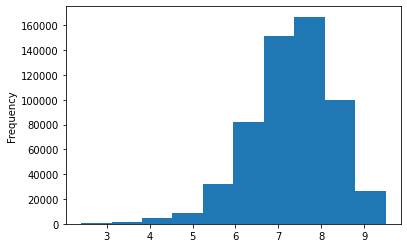

In [100]:
df['actualrating'].plot(kind='hist')

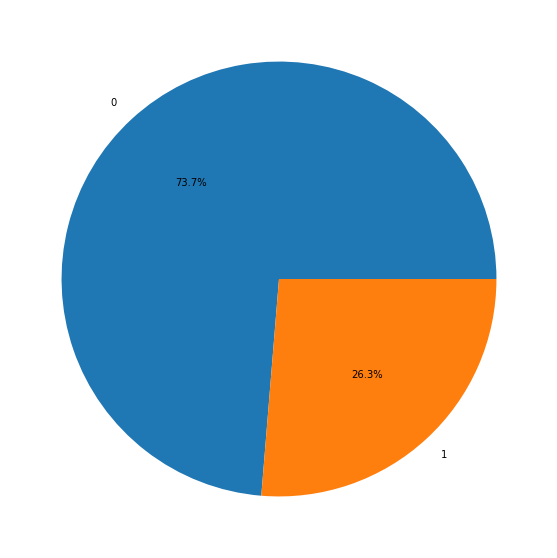

In [101]:
labels, frequencies = np.unique(df.is_spoiler.values,return_counts = True)

plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.show()

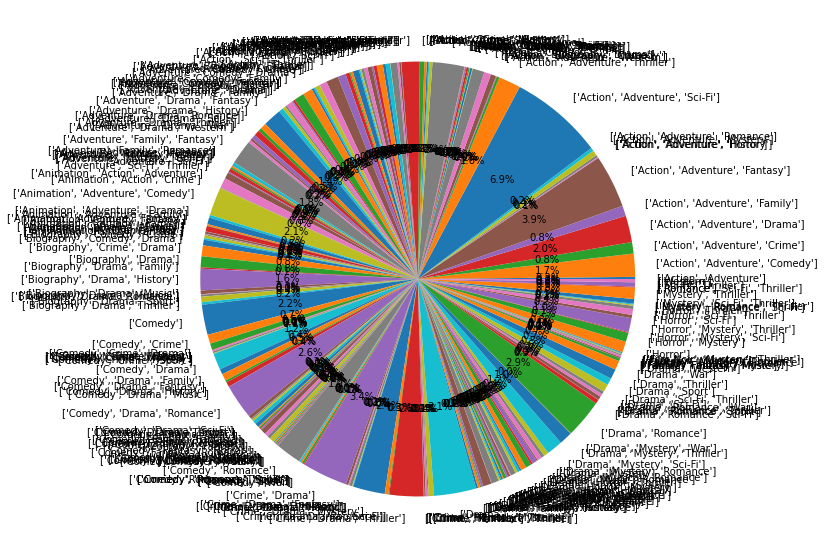

In [102]:
labels, frequencies = np.unique(df.genre.values,return_counts = True)

plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.show()

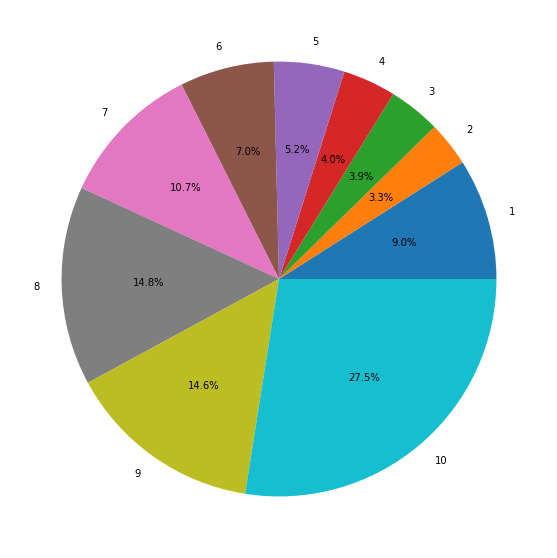

In [103]:
labels, frequencies = np.unique(df[df['is_spoiler']==0].userrating.values,return_counts = True)

plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.show()

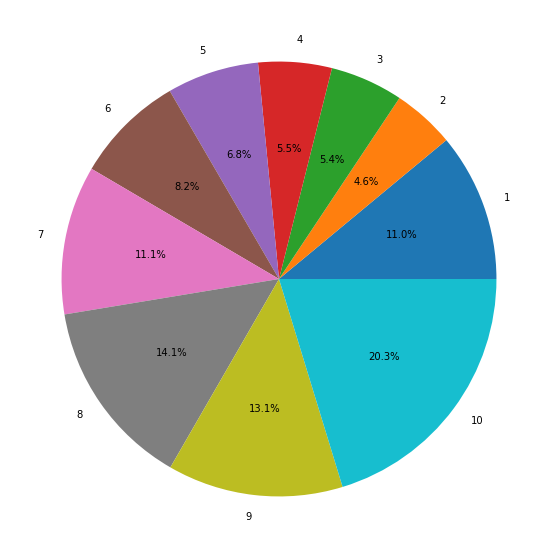

In [104]:
labels, frequencies = np.unique(df[df['is_spoiler']==1].userrating.values,return_counts = True)

plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.show()

In [105]:
df.head()

,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,genre,actualrating,plot_synopsis
0,tt0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,tt0111161,ur0842118,1,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,tt0111161,ur1285640,1,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,tt0111161,ur1003471,1,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,tt0111161,ur0226855,1,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."


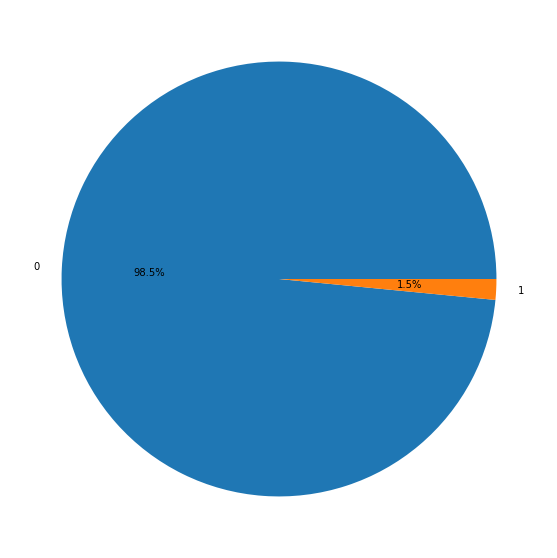

In [115]:
labels, frequencies = np.unique(df[df['user_id']=='ur2898520'].is_spoiler.values,return_counts = True)

plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.show()

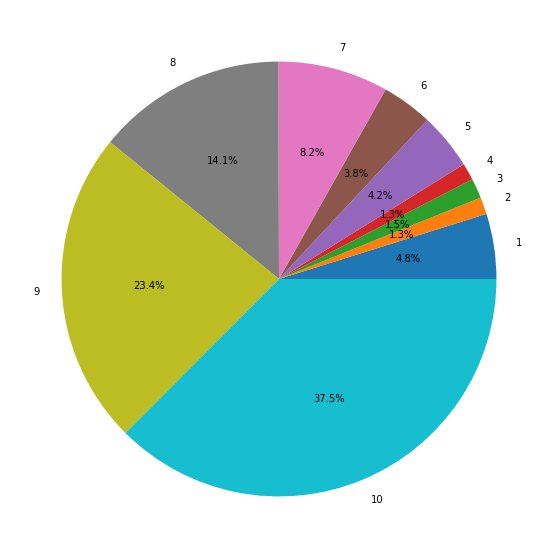

In [116]:
labels, frequencies = np.unique(df[df['movie_id']=='tt1291584'].userrating.values,return_counts = True)

plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.show()

In [117]:
df['user_id'].value_counts()[:5]

ur2898520     1303
ur4248714     1021
ur0453068      806
ur60028700     770
ur20552756     755
Name: user_id, dtype: int64

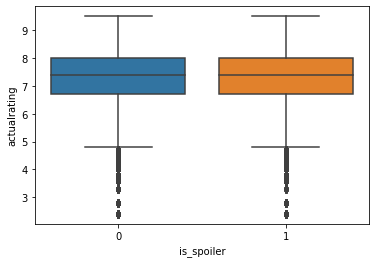

In [118]:

sns.boxplot(x= df.is_spoiler,y=df.actualrating)


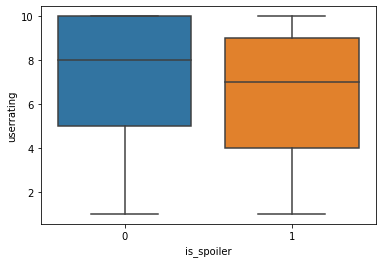

In [119]:
sns.boxplot(x= df.is_spoiler,y=df.userrating)

# Movie spoiler ratio

In [120]:
total_spoilers= df.groupby(by='movie_id').is_spoiler.agg(['sum']).reset_index().rename(columns={'sum':'total_spoilers'})

In [121]:
total_movies = df.groupby(by='movie_id').movie_id.agg(['count']).reset_index().rename(columns={'count':'total_movies'})

In [122]:
msr = pd.merge(total_spoilers,total_movies, on='movie_id')

In [123]:
msr['msr']=msr.total_spoilers/msr.total_movies

In [124]:
msr.head()

,movie_id,total_spoilers,total_movies,msr
0,tt0012349,26,104,0.250000
1,tt0015864,39,128,0.304688
2,tt0017136,73,337,0.216617
3,tt0017925,50,192,0.260417
4,tt0018455,63,178,0.353933


In [125]:
msr.drop(['total_spoilers','total_movies'], axis=1, inplace=True)

In [126]:
df=pd.merge(df,msr,on='movie_id')

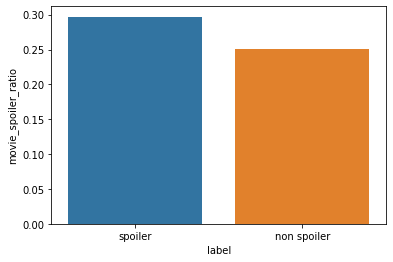

In [127]:
df_temp = pd.DataFrame({"label":["spoiler", "non spoiler"],
                        "movie_spoiler_ratio":[df[df.is_spoiler==1].msr.mean(), 
                                            df[df.is_spoiler==0].msr.mean()]})
sns.barplot(x = "label", y = "movie_spoiler_ratio", data = df_temp);

#User Spoiler Ratio 

In [128]:
total_user_spoilers = df.groupby(by='user_id').is_spoiler.agg(['sum']).reset_index().rename(columns={'sum':'total_user_spoilers'})


In [129]:
total_users = df.groupby(by='user_id').user_id.agg(['count']).reset_index().rename(columns={'count':'total_users'})


In [130]:
usr = pd.merge(total_user_spoilers,total_users, on='user_id')

In [131]:
usr['usr']=usr.total_user_spoilers / usr.total_users

In [132]:
usr.drop(['total_user_spoilers','total_users'], axis=1,inplace=True)

In [133]:
df= pd.merge(df, usr, on='user_id')

In [134]:
df_temp = pd.DataFrame({"label":["spoiler", "non spoiler"],
                      "users_spoiler_ratio":[df[df.is_spoiler==1].usr.mean(), 
                                            df[df.is_spoiler==0].usr.mean()]})


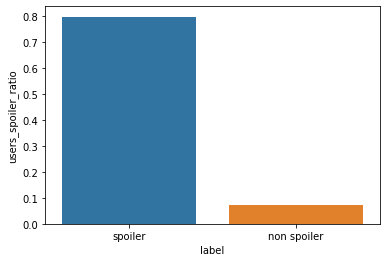

In [135]:
sns.barplot(x = "label", y = "users_spoiler_ratio", data = df_temp)

# Some Genres tend to have more spoilers

<h2>Some genre categories combined together will produce more spoilers so our goal is to segregate those particular genre category combos and use them to predict if movie can have spoiler review or not</h2>

In [136]:
genres= np.unique(np.array(' '.join(df.genre.str.join(' ')).split()))

In [137]:
genres

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'], dtype='<U9')

In [138]:
genre_df=pd.DataFrame()

In [139]:
for i in genres:
    genre_df[i.lower()]=0

In [140]:
c=0

In [141]:
df.isnull()

,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,genre,actualrating,plot_synopsis,msr,usr
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
573901,False,False,False,False,False,False,False,False,False,False,False,False
573902,False,False,False,False,False,False,False,False,False,False,False,False
573903,False,False,False,False,False,False,False,False,False,False,False,False
573904,False,False,False,False,False,False,False,False,False,False,False,False


In [142]:
for i,data in df_details.iterrows():
    #Assigns details pertaining to a movie to a variable
    details=df_details[df_details.movie_id==data['movie_id']]
    genre_df.at[i,'movie_id']=data['movie_id']
    for genre in genres:
        #Checks if movie belongs to the genre or not 
        genre_df.at[i,genre.lower()]=int(genre in details['genre'].tolist()[0])

In [143]:
genre_df.head()

,action,adventure,animation,biography,comedy,crime,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western,movie_id
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,tt0105112
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tt1204975
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,tt0243655
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,tt0040897
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,tt0126886


In [144]:
df_temp= pd.merge(df, genre_df, on="movie_id")

In [145]:
df_temp.head()

,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,genre,actualrating,plot_synopsis,msr,usr,action,adventure,animation,biography,comedy,crime,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western
0,tt0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker...",0.219216,0.600000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tt0111161,ur0842118,1,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker...",0.219216,0.250000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tt0111161,ur1285640,1,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker...",0.219216,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt0111161,ur1003471,1,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker...",0.219216,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt0111161,ur0226855,1,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker...",0.219216,0.135714,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
df_temp.shape

(573906, 33)

In [147]:
e = 0.001
gsr = np.zeros(len(genres))
for i,g in enumerate(genres):
    # i.e. total no. of reviews with spoiler belonging to a genre /total no. of reviews of movie genre
    gsr[i] = df_temp[(df_temp.is_spoiler==1) &
                                     (df_temp[g.lower()]==1)].shape[0] / (df_temp[df_temp[g.lower()]==1].shape[0]
                                                                          +e)

In [148]:
gsr

array([0.28260197, 0.28689807, 0.25694626, 0.24139909, 0.2156022 ,
       0.24629342, 0.25653166, 0.27053262, 0.28138213, 0.27247333,
       0.23578351, 0.29666125, 0.20991318, 0.20297205, 0.28947245,
       0.23652655, 0.31211931, 0.23998089, 0.28114596, 0.24305825,
       0.25500944])

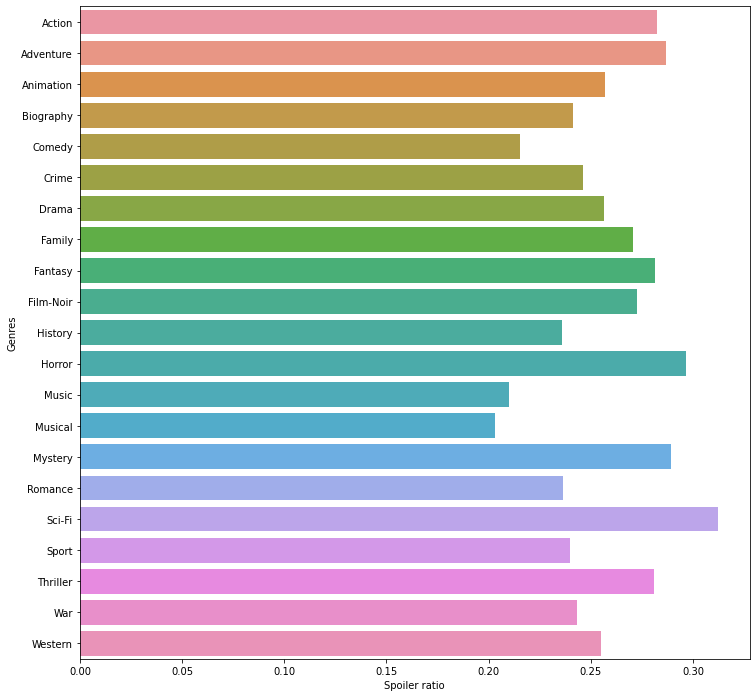

In [149]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x=gsr,y=genres)
ax.set(xlabel="Spoiler ratio",ylabel="Genres");
plt.show();

# Calculating spoiler ratio for combination of genres 

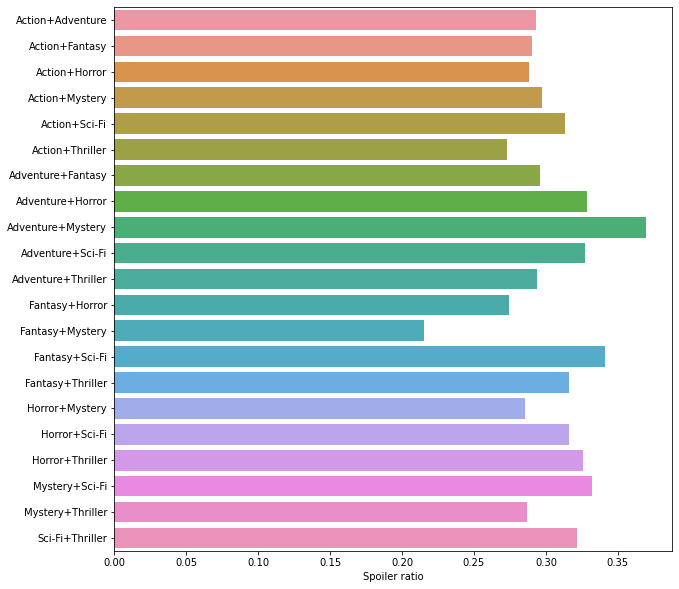

In [150]:
e = 0.001
selected = ["Action","Adventure","Fantasy","Horror","Mystery","Sci-Fi","Thriller"]

genre2 = []
genre2ratios = []

i=0
while i < len(selected):
    j = i+1
    while j < len(selected):
        # i.e. ratio of total movies reviews having spoilers belonging to selected genres / total reviews of the movies of selected genres
        genre2.append(selected[i]+"+"+selected[j])
        spoilers = df_temp[(df_temp[selected[i].lower()]==1) & (df_temp[selected[j].lower()]==1) & df_temp.is_spoiler].shape[0]
        total = df_temp[(df_temp[selected[i].lower()]==1) & (df_temp[selected[j].lower()]==1)].shape[0]
        genre2ratios.append(spoilers / (total+e))
        j+=1
    i+=1
plt.figure(figsize=(10,10))    
ax = sns.barplot(x=genre2ratios,y=genre2)
ax.set(xlabel="Spoiler ratio");
plt.show();

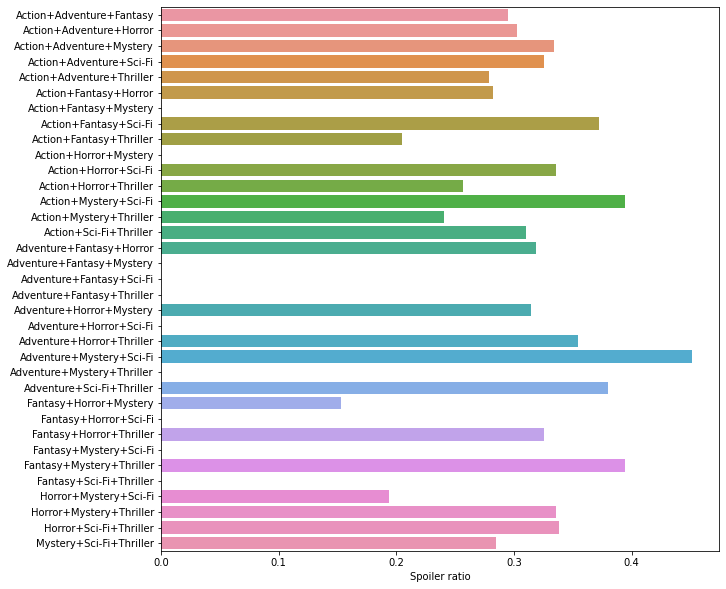

In [151]:
genre3= []
genre3ratios = []

i=0
while i < len(selected):
    j = i+1
    while j < len(selected):
        k = j+1
        while k < len(selected):
            genre3.append(selected[i]+"+"+selected[j]+"+"+selected[k])
            spoilers = df_temp[(df_temp[selected[k].lower()]==1) & (df_temp[selected[i].lower()]==1) & (df_temp[selected[j].lower()]==1) & df_temp.is_spoiler].shape[0]
            total = df_temp[(df_temp[selected[k].lower()]==1) & (df_temp[selected[i].lower()]==1) & (df_temp[selected[j].lower()]==1)].shape[0]
            genre3ratios.append(spoilers / (total+e))
            k+=1
        j+=1
    i+=1
    
plt.figure(figsize=(10,10))
ax = sns.barplot(x=genre3ratios,y=genre3)
ax.set(xlabel="Spoiler ratio");
plt.show();

In [152]:
def isListSubset(a,b):
    count = 0
    for i,v in enumerate(a):
        if v in b:
            count += 1
    return count == len(a)

def getGenreRatio(genres):
    return isListSubset(["Fantasy","Sci-Fi"], genres) or isListSubset(["Adventure","Mystery"], genres) or isListSubset(["Action","Mystery","Sci-Fi"], genres) or isListSubset(["Adventure","Horror","Thriller"], genres) or isListSubset(["Adventure","Thriller"], genres) or isListSubset(["Fantasy","Mystery"], genres)

In [153]:
df_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [154]:
df['gsr'] = pd.merge(df,df_details.drop(['genre'],axis=1),on="movie_id").genre.apply(getGenreRatio)+0

In [155]:
df.head()

,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,genre,actualrating,plot_synopsis,msr,usr,gsr
0,tt0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker...",0.219216,0.6,0
1,tt0144084,ur1898687,0,"Starring: Christian Bale, Willem Dafoe, Chloë ...",8,"Worth seeing, if only for the post-viewing dis...","Patrick Bateman is handsome, well educated and...","[Crime, Drama]",7.6,A white background. Red drops begin to fall pa...,0.274725,0.6,0
2,tt0298203,ur1898687,1,"Eminem's ""semi-autobiographical"" rap movie. Do...",7,Better than it needed to be.,This is the inspiring captivating story of the...,"[Drama, Music]",7.1,"It's 1995. Jimmy ""B-Rabbit"" Smith Jr. (Eminem)...",0.164456,0.6,0
3,tt0319061,ur1898687,0,The grass is so green / The sky is so blue / S...,9,An immediate classic that works on both a visu...,United Press International journalist Will Blo...,"[Adventure, Drama, Fantasy]",8.0,"Edward Bloom (Albert Finney), a charismatic te...",0.158416,0.6,0
4,tt0377092,ur1898687,1,There are a few signs heading into Mean Girls ...,7,"A smart, but flawed, look at high school life","Her parents being zoologists, homeschooled Cad...",[Comedy],7.0,Cady (Lindsay Lohan) is the 16-year-old home-s...,0.222472,0.6,0


# Spoiler Text in review 

In [156]:
df[df.review_text.str.contains('SPOILERS')]

,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,genre,actualrating,plot_synopsis,msr,usr,gsr
10,tt0111161,ur1003471,1,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker...",0.219216,0.5,0
14,tt0088247,ur1003471,1,***MINOR SPOILERS AHEAD***There's been so much...,8,"Simple idea, perfect realization",A cyborg is sent from the future on a deadly m...,"[Action, Sci-Fi]",8.0,Over an apocalyptic battlefield in the year 20...,0.261261,0.5,0
16,tt0240772,ur1003471,1,"***MINOR SPOILERS***Soderbergh goes Vegas!OK, ...",8,Start spreading the news...,Danny Ocean wants to score the biggest heist i...,"[Crime, Thriller]",7.8,"Daniel Ocean (George Clooney), a convicted thi...",0.134935,0.5,0
17,tt0217505,ur1003471,1,***SPOILERS HO!***Before I start I'd like to s...,4,The cat in the hat comes back. Why?,Having seen his father killed in a major gang ...,"[Crime, Drama]",7.5,The film opens with Priest Vallon (Liam Neeson...,0.171322,0.5,0
19,tt0286499,ur1003471,1,** MINOR SPOILERS **This film is like that epi...,4,The best British women's football film since G...,A comedy about bending the rules to reach your...,"[Comedy, Drama, Romance]",6.7,"Jesminder ""Jess"" Bhamra (Parminder Nagra) is t...",0.100946,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572748,tt0182789,ur1354522,1,***SPOILERS*** ***SPOILERS*** The movie did ...,10,Asimov's 3 laws of robotics are the central th...,This film follows the 'life' and times of the ...,"[Comedy, Drama, Sci-Fi]",6.8,"The NDR series robot ""Andrew"" is introduced in...",0.203636,1.0,0
572749,tt0182789,ur1288887,1,"SPOILERS BEWARE!!!!\nI am late.. But, I just s...",10,Awesome movie. Very touching.,This film follows the 'life' and times of the ...,"[Comedy, Drama, Sci-Fi]",6.8,"The NDR series robot ""Andrew"" is introduced in...",0.203636,1.0,0
572926,tt0171804,ur1359036,1,***SPOILERS*** ***SPOILERS*** ***SPOILERS*...,10,A tragic masterpiece,Based on actual events. Brandon Teena is the p...,"[Biography, Crime, Drama]",7.6,The film opens with Brandon Teena (Hilary Swan...,0.161074,1.0,0
573140,tt0140352,ur1242481,1,***SPOILERS*** ***SPOILERS*** Having taken t...,10,"If only all films were this cinematic, this en...","Balls-out ""60 Minutes"" producer Lowell Bergman...","[Biography, Drama, Thriller]",7.9,"In Lebanon, Hezbollah militants escort produce...",0.082687,1.0,0


In [157]:
df['spoiltext'] = df.review_text.str.contains('SPOILERS')+0

In [158]:
df.head()

,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,genre,actualrating,plot_synopsis,msr,usr,gsr,spoiltext
0,tt0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,"[Crime, Drama]",9.3,"In 1947, Andy Dufresne (Tim Robbins), a banker...",0.219216,0.6,0,0
1,tt0144084,ur1898687,0,"Starring: Christian Bale, Willem Dafoe, Chloë ...",8,"Worth seeing, if only for the post-viewing dis...","Patrick Bateman is handsome, well educated and...","[Crime, Drama]",7.6,A white background. Red drops begin to fall pa...,0.274725,0.6,0,0
2,tt0298203,ur1898687,1,"Eminem's ""semi-autobiographical"" rap movie. Do...",7,Better than it needed to be.,This is the inspiring captivating story of the...,"[Drama, Music]",7.1,"It's 1995. Jimmy ""B-Rabbit"" Smith Jr. (Eminem)...",0.164456,0.6,0,0
3,tt0319061,ur1898687,0,The grass is so green / The sky is so blue / S...,9,An immediate classic that works on both a visu...,United Press International journalist Will Blo...,"[Adventure, Drama, Fantasy]",8.0,"Edward Bloom (Albert Finney), a charismatic te...",0.158416,0.6,0,0
4,tt0377092,ur1898687,1,There are a few signs heading into Mean Girls ...,7,"A smart, but flawed, look at high school life","Her parents being zoologists, homeschooled Cad...",[Comedy],7.0,Cady (Lindsay Lohan) is the 16-year-old home-s...,0.222472,0.6,0,0


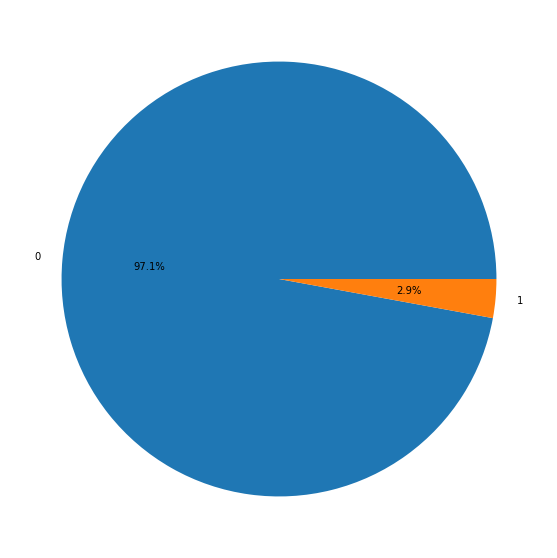

In [159]:
labels, frequencies = np.unique(df[df['is_spoiler']==1].spoiltext.values,return_counts = True)

plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.show()

#  Matching Text from reviews with plot summary


Comparing the similarity of spoiler reviews to movie plot summary will be a good indicator as to if a review contains spoiler or not 

In [160]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [161]:
stopwords=set(stopwords.words('english'))

In [162]:
len(stopwords)

179

In [163]:
stopwords_dict=Counter(stopwords)

In [164]:
def preprocesstext(review):
    review=review.lower()
    review=re.sub('[^a-zA-Z]',' ',review)
    words=review.split()
    word=[word for word in words if word not in stopwords_dict]
    review=" ".join(words)
    return review

In [165]:
df.review_text=df.review_text.apply(preprocesstext)

In [166]:
df.review_text

0         in its oscar year shawshank redemption written...
1         starring christian bale willem dafoe chlo sevi...
2         eminem s semi autobiographical rap movie do i ...
3         the grass is so green the sky is so blue spect...
4         there are a few signs heading into mean girls ...
                                ...                        
573901    i think this movie was under appreciated by am...
573902    this type of movie is one that i would not ord...
573903    go is wise fast and pure entertainment assembl...
573904    go is the best movie i have ever seen and i ve...
573905    why was this movie made no doubt to sucker in ...
Name: review_text, Length: 573906, dtype: object

Using glove-global-vectors for words.These pre-trained embeddings are used  to quantify word co-occurrence (which also captures some aspects of word meaning). This dataset contains 50-dimensional, 100-dimensional and 200-dimensional pre trained word vectors

In [167]:
#Saving the words and their corresponding vectors in  a dictionary
embeddings=dict()
f=open('/content/glove.6B.50d.txt')
for i in f: 
    values=i.split()
    word=values[0]
    cofss = np.asarray(values[1:], dtype='float32')
    embeddings[word]=cofss
f.close()    

In [168]:
def getAvgWordEmbedding(text):
    words = text.split()
    n = 0
    sumEmbed = np.zeros(50)
    # because 50 dim of word vectors
    
    for word in words:
        if word in embeddings:
            sumEmbed += embeddings[word]
            n += 1
    
    avgEmbed = sumEmbed / n
    return avgEmbed
    
def Dist(e1, e2):
    return np.sum(np.square(e1-e2), axis = 1)

In [169]:
df_details.plot_summary

0       Former CIA analyst, Jack Ryan is in England wi...
1       Billy (Michael Douglas), Paddy (Robert De Niro...
2       The setting is Camp Firewood, the year 1981. I...
3       Fred C. Dobbs and Bob Curtin, both down on the...
4       Tracy Flick is running unopposed for this year...
                              ...                        
1567    Evan Treborn grows up in a small town with his...
1568    Brandon is a 30-something man living in New Yo...
1569    Evacuation of Allied soldiers from the British...
1570    For a while now, beautiful 24-year-old Diana B...
1571    The marriage of David Burgess, a senior execut...
Name: plot_summary, Length: 1572, dtype: object

In [170]:
plot_embed = df.plot_summary.apply(getAvgWordEmbedding)
review_embed = df.review_text.apply(getAvgWordEmbedding)

In [171]:
distance=Dist(np.stack(review_embed),np.stack(plot_embed))

In [172]:
df['distance']=distance

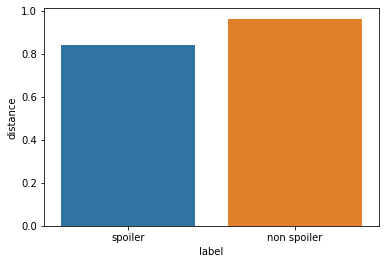

In [173]:
df_temp = pd.DataFrame({"label":["spoiler", "non spoiler"], 
                        "distance":[df[df.is_spoiler==1].distance.mean(), 
                                        df[df.is_spoiler==0].distance.mean()]})
sns.barplot(x = "label", y = "distance", data = df_temp);

As can be seen from all the above new dimensions introduced we don't have a single  criteria to distinguish between spoiler and non spoiler reviews  but its dependent a no. of criterias  so in order to solve this problem we will now look into a way to unify all these criterias using machine learning to help us in separating non spoiler reviews from spoiler reviews.


#Preparing sets


In [240]:
spoilers = df[df.is_spoiler == 1].sample(frac=1).reset_index(drop=True)
notspoilers = df[df.is_spoiler == 0].sample(frac=1).reset_index(drop=True)

In [241]:
len(spoilers),len(notspoilers)

(100000, 100001)

In [242]:
# train set
df = pd.concat([spoilers.head(100000), notspoilers.head(100001)]).sample(frac=1).reset_index(drop=True)

# test set
test = pd.concat([spoilers.tail(50000), notspoilers.tail(100001)]).sample(frac=1).reset_index(drop=True)

In [243]:
#If used train_test_split earlier for randomly sampled data from entire dataset add these pramas just as we did while training
# test0 = pd.merge(test, usr, how = 'left', on = 'user_id')
# test0 = pd.merge(test0, msr, how = 'left', on = 'movie_id')
# test0['gsr'] = test0.genre.apply(getGenreRatio)+0
# test0.review_text = test0.review_text.apply(preprocesstext)
# review_embed_test = test.review_text.apply(getAvgWordEmbedding)
# plot_embed_test = test.plot_summary.apply(getAvgWordEmbedding)
# test0['distance'] = Dist(np.stack(review_embed_test), np.stack(plot_embed_test))
#test0['spoiltext'] = test0.review_summary.str.contains('SPOILERS')+0

In [244]:
df.columns

Index(['movie_id', 'user_id', 'is_spoiler', 'review_text', 'userrating',
       'review_summary', 'plot_summary', 'genre', 'actualrating',
       'plot_synopsis', 'msr', 'usr', 'gsr', 'spoiltext', 'distance'],
      dtype='object')

In [245]:
x = df[['msr','usr','gsr','distance','spoiltext','actualrating']]
x = x.fillna(0)

In [246]:
y=df['is_spoiler']

In [247]:
x.shape

(200001, 6)

In [248]:
test.columns

Index(['movie_id', 'user_id', 'is_spoiler', 'review_text', 'userrating',
       'review_summary', 'plot_summary', 'genre', 'actualrating',
       'plot_synopsis', 'msr', 'usr', 'gsr', 'spoiltext', 'distance'],
      dtype='object')

In [249]:
x_test = test[['msr','usr','gsr','distance','spoiltext','actualrating']]
x_test = x_test.fillna(0)

In [250]:
y_test=test['is_spoiler']

# Using Linear svm model 


In [257]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(x.values, y.values)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [258]:
preds = model_svm.predict(x.values)

In [259]:
print(classification_report(y.values, preds))
print(confusion_matrix(y.values, preds))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91    100001
           1       0.91      0.91      0.91    100000

    accuracy                           0.91    200001
   macro avg       0.91      0.91      0.91    200001
weighted avg       0.91      0.91      0.91    200001

[[91360  8641]
 [ 9330 90670]]


In [260]:
preds_new = model_svm.predict(x_test.values)

In [261]:
print(classification_report(y_test.values, preds_new))
print(confusion_matrix(y_test.values, preds_new))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93    100001
           1       0.84      0.91      0.87     50000

    accuracy                           0.91    150001
   macro avg       0.90      0.91      0.90    150001
weighted avg       0.91      0.91      0.91    150001

[[91360  8641]
 [ 4642 45358]]


# Training an SVM model using the newly created dimensions for the reviews

In [251]:
model_svm = svm.SVC(gamma='scale',C=10)
model_svm.fit(x.values, y.values)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [252]:
preds = model_svm.predict(x.values)

In [253]:
print(classification_report(y.values, preds))
print(confusion_matrix(y.values, preds))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91    100001
           1       0.91      0.92      0.91    100000

    accuracy                           0.91    200001
   macro avg       0.91      0.91      0.91    200001
weighted avg       0.91      0.91      0.91    200001

[[90435  9566]
 [ 8126 91874]]


In [254]:
preds_new = model_svm.predict(x_test.values)  

In [255]:
print(classification_report(y_test.values, preds_new))
print(confusion_matrix(y_test.values, preds_new))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93    100001
           1       0.83      0.92      0.87     50000

    accuracy                           0.91    150001
   macro avg       0.89      0.91      0.90    150001
weighted avg       0.91      0.91      0.91    150001

[[90435  9566]
 [ 4044 45956]]


# FastAI approach